# WordCloud

**`WordCloud`** es una libreria desarrollada por **Andreas Mueller** y nos permite generar nubes de palabras (**wordclouds**) utilizando solamente una cadena de caracteres. 

```python
pip install wordcloud
```

_**Documentación:** https://github.com/amueller/word_cloud_

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from wordcloud import WordCloud, STOPWORDS

from PIL import Image

#### Cargamos un archivo de texto:

In [23]:
with open("data/alicia.txt", mode = "r", encoding = "UTF-8") as file:
    alice_novel = file.read()

In [24]:
len(alice_novel)

170707

In [25]:
alice_novel

'The Project Gutenberg EBook of Aliceâ€™s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Aliceâ€™s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nRelease Date: June 25, 2008 [EBook #11]\nLast Updated: February 22, 2020\n\nLanguage: English\n\nCharacter set encoding: UTF-8\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICEâ€™S ADVENTURES IN WONDERLAND ***\n\n\n\nProduced by Arthur DiBianca and David Widger\n\n[Illustration]\n\n\n\n\nAliceâ€™s Adventures in Wonderland\n\nby Lewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\nContents\n\n CHAPTER I.     Down the Rabbit-Hole\n CHAPTER II.    The Pool of Tears\n CHAPTER III.   A Caucus-Race and a Long Tale\n CHAPTER IV.    The Rabbit Sends in a Little Bill\n CHAPTER V.     

In [26]:
import re

alice_novel_clean = re.sub(r'œ', '', alice_novel)

### stopwords
Palabras vacías (**stopwords en inglés**) es el nombre que reciben las palabras sin significado como artículos, pronombres, preposiciones, etc. que son filtradas antes o después del procesamiento de datos en **`NLP`**.

In [28]:
stopwords = STOPWORDS

stopwords

{'Gutenberg',
 'I',
 'Iâm',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'came',
 'can',
 "can't",
 'cannot',
 'com',
 'come',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'even',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 'know',
 "let's",
 'like',
 'may',
 'me',
 'more',
 'most',
 'must',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'now',
 

**Para crear un objeto WordCloud utilizamos la función `WordCloud()` que toma como parámetros el número total de palabras y los `stopswords`**.

**Para generar la nube debemos llenarla con las palabras del texto usando el método `.generate()`.**

In [29]:
alice_wc = WordCloud(background_color = "white",
                     max_words        = len(alice_novel),
                     stopwords        = stopwords)

# El objeto de WordCloud

alice_wc.generate(text = alice_novel)

**Para mostrar la imagen usamos la libreria de `matplotlib`**

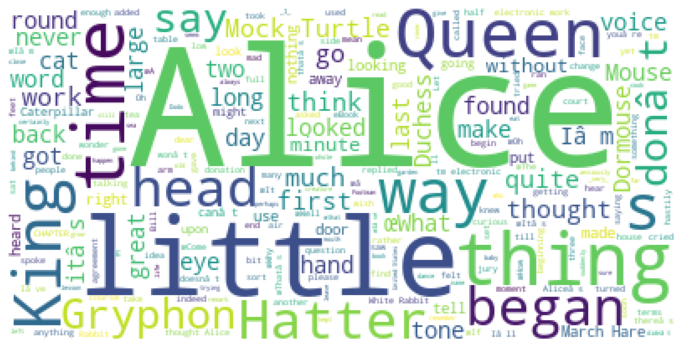

In [30]:
plt.subplots(figsize = (12, 12))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

**Para eliminar esos caracteres que no son palabras podemos agregalos a la lista de `stopwords`.**

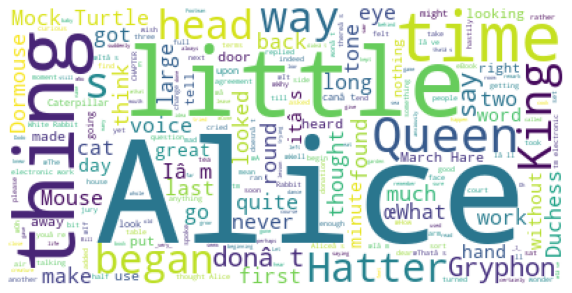

In [31]:
stopwords.add("said")
stopwords.add("one") 
stopwords.add("know") 
stopwords.add("will") 
stopwords.add("must") 
stopwords.add("went") 
stopwords.add("us") 
stopwords.add("come") 
stopwords.add("see") 
stopwords.add("well") 
stopwords.add("now") 
stopwords.add("may") 
stopwords.add("came") 
stopwords.add("seemed") 
stopwords.add("even") 
stopwords.add("project")
stopwords.add("Gutenberg")
stopwords.add("and")
stopwords.add("â")
stopwords.add("œ")
stopwords.add("Œ")
stopwords.add("I")
stopwords.add("œI")
stopwords.add("œand")
stopwords.add("œYou")
stopwords.add("Iâm")
stopwords.add("œBut")


# Creamos de nuevo el objeto

alice_wc = WordCloud(background_color = "white",
                     max_words        = len(alice_novel),
                     stopwords        = stopwords)

alice_wc.generate(alice_novel)

plt.subplots(figsize = (10, 10))
plt.imshow(alice_wc)
plt.axis("off")
plt.show()

**También podemos usar una `mascara` para que el wordcloud tome la forma de una figura en lugar de un rectangulo.**

**Para esto necesitamos un archivo con extensión `.png`.**

In [32]:
mask = np.array(Image.open("Data/alice_mask.png"))   
mask.shape

(523, 481, 3)

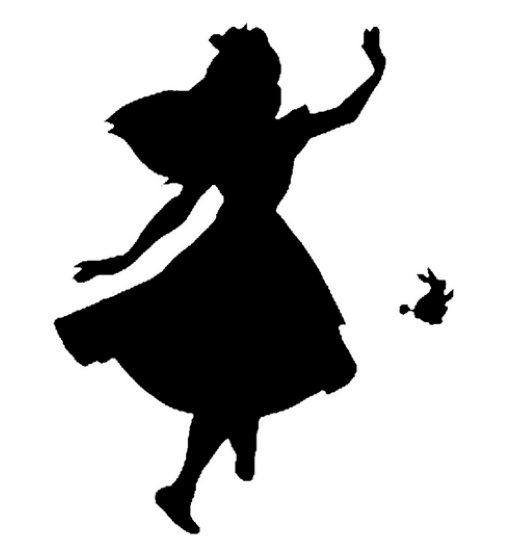

In [33]:
plt.subplots(figsize = (10, 10))

plt.imshow(mask, cmap = "binary_r")
plt.axis("off")
plt.show()

**Para unir el `wordcloud` con la mascara agregamos el parámetro `mask`.**

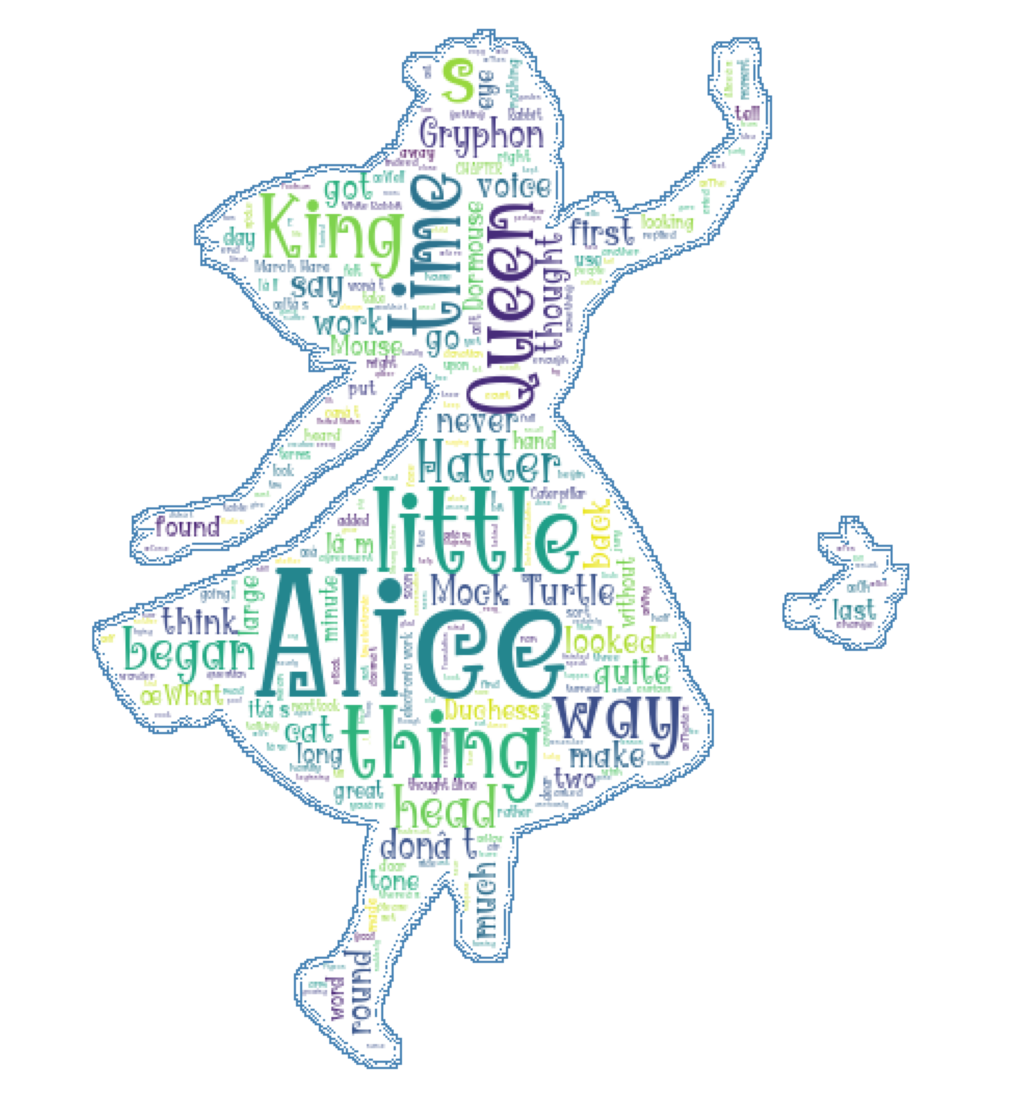

In [34]:
# Creamos de nuevo el objeto agregando la mascara

alice_wc = WordCloud(background_color = "white",
                     max_words        = len(alice_novel),
                     mask             = mask,
                     stopwords        = stopwords,
                     contour_width    = 0.5,
                     contour_color    = "steelblue",
                     font_path        = "data/Witch Mystery.otf"
                    )

alice_wc.generate(alice_novel)


fig, ax = plt.subplots(figsize = (20, 20))
ax.imshow(alice_wc)
ax.axis("off")
alice_wc.to_file("data/output/imagenalicia.png")
plt.show()

**Otro `wordcloud`:**

In [35]:
with open("Data/breakingbadscript.txt", "r", encoding = "UTF-8") as file:
    breakingbad_script = file.read()

In [37]:
print(breakingbad_script)

CREATED BY
Vince Gilligan
EPISODE 5.14
“Ozymandias”
As the series draws to a close, everyone copes with radically
changed circumstances.
WRITTEN BY:
Moira Walley-Beckett
DIRECTED BY:
Rian Johnson
ORIGINAL BROADCAST:
September 15, 2013
NOTE: This is a transcription of the spoken dialogue and audio, with time-code reference, provided without cost by 8FLiX.com
for your entertainment, convenience, and study. This version may not be exactly as written in the original script; however, the
intellectual property is still reserved by the original source and may be subject to copyright.
MAIN EPISODE CAST
Bryan Cranston ... Walter White
Anna Gunn ... Skyler White
Aaron Paul ... Jesse Pinkman
Dean Norris ... Hank Schrader
Betsy Brandt ... Marie Schrader
RJ Mitte ... Walter White, Jr.
Bob Odenkirk ... Saul Goodman (credit only)
Laura Fraser ... Lydia Rodarte-Quayle (credit only)
Jesse Plemons ... Todd
Steven Michael Quezada ... Steven Gomez
Michael Bowen ... Uncle Jack
Kevin Rankin ... Kenny
Patric

In [46]:
bb_wc = WordCloud(background_color = "white",
                  max_words        = len(breakingbad_script),
                  stopwords        = stopwords,
                  colormap         = "viridis")

# El objeto de word cloud
bb_wc.generate(breakingbad_script)

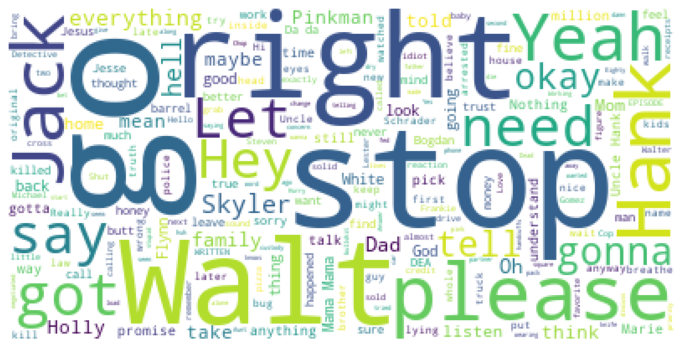

In [47]:
plt.subplots(figsize = (12, 12))
plt.imshow(bb_wc)
plt.axis("off")
plt.show()

In [55]:
breakingbad_mask = np.array(Image.open("Data/breakingbad_mask.png"))
breakingbad_mask.shape

(3371, 3054, 4)

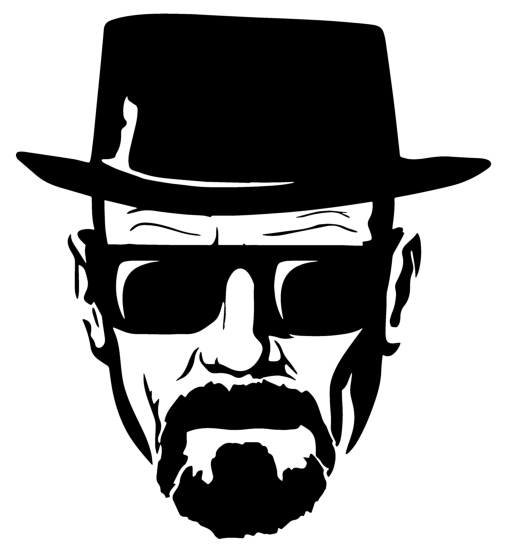

In [56]:
plt.subplots(figsize = (10, 10))

plt.imshow(breakingbad_mask)
plt.axis("off")
plt.show()

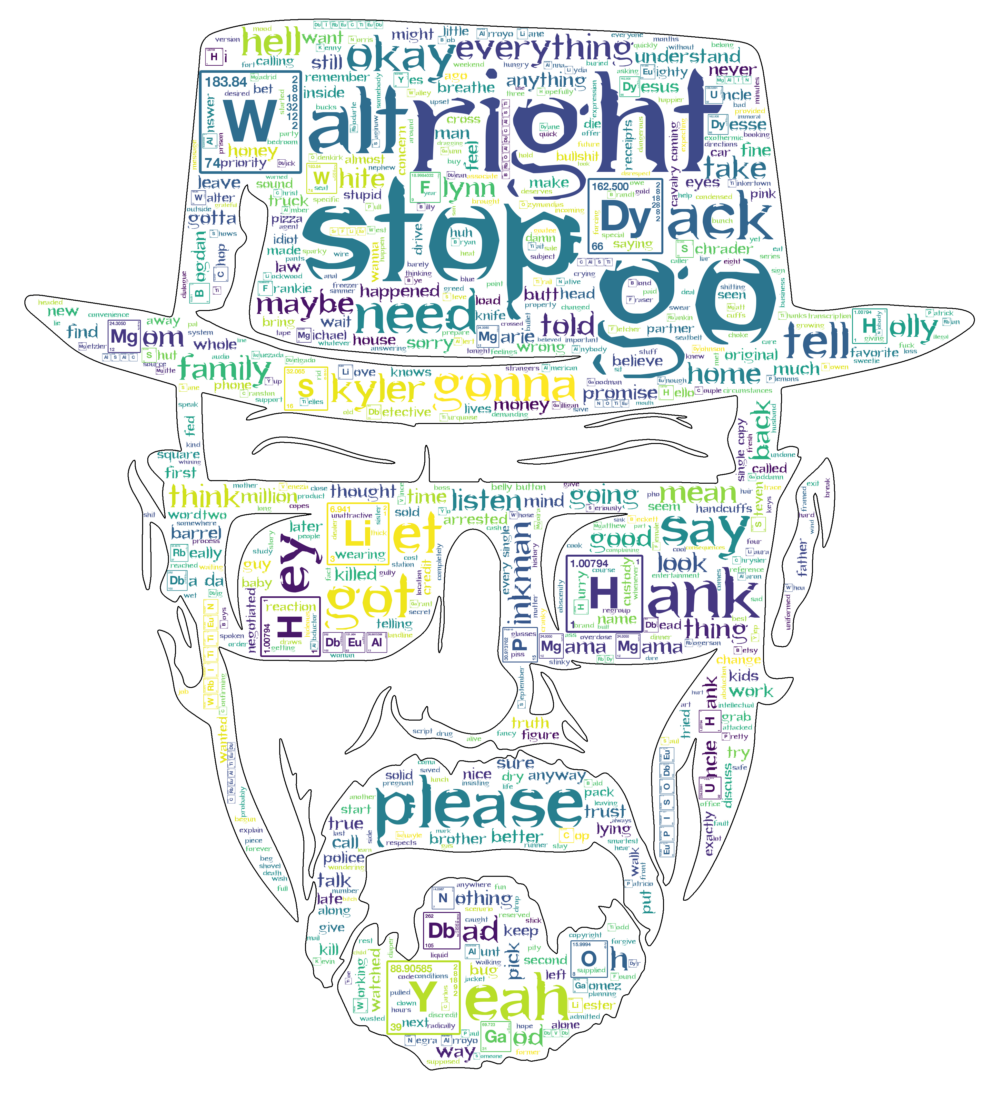

Wall time: 1min 26s


In [50]:
%%time

# Creamos de nuevo el objeto agregando la mascara
bb_wc = WordCloud(background_color = "white",
                  max_words        = 2000,
                  mask             = breakingbad_mask,
                  stopwords        = stopwords,
                  contour_width    = 2,
                  contour_color    = "black",
                  font_path        = "data/Heart Breaking Bad.otf"
                 )

bb_wc.generate(breakingbad_script)

plt.subplots(figsize = (20, 20))

plt.imshow(bb_wc, interpolation = "bilinear")
plt.axis("off")
bb_wc.to_file("data/output/imagenbb.png")
plt.show()

In [62]:
breakingbad_mask2 = np.array(Image.open("data/twitter_mask.png"))
breakingbad_mask2.shape

(808, 1000, 4)

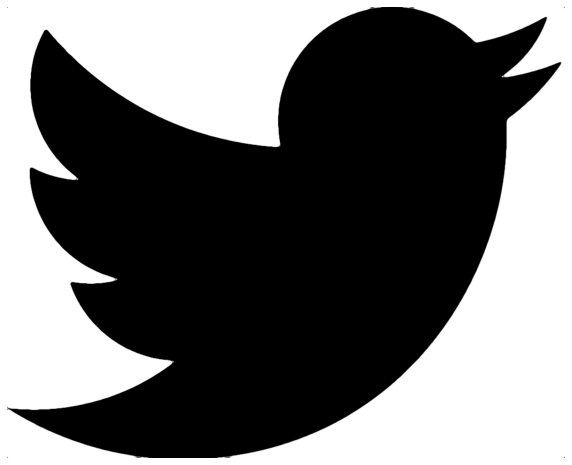

In [63]:
plt.subplots(figsize = (10, 10))

plt.imshow(breakingbad_mask2)
plt.axis("off")
plt.show()

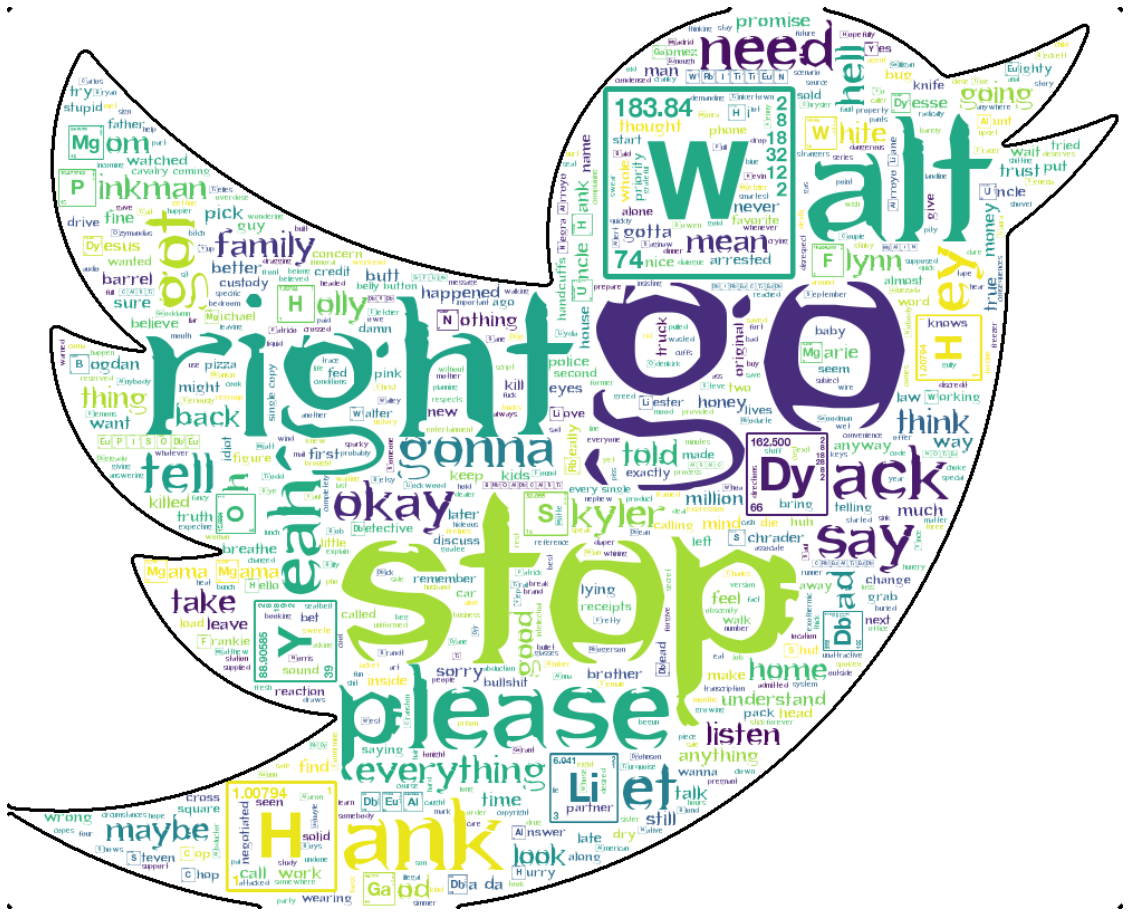

Wall time: 4.83 s


In [64]:
%%time

# Creamos de nuevo el objeto agregando la mascara
bb_wc = WordCloud(background_color = "white",
                  max_words        = 2000,
                  mask             = breakingbad_mask2,
                  stopwords        = stopwords,
                  contour_width    = 2,
                  contour_color    = "black",
                  font_path        = "data/Heart Breaking Bad.otf"
                 )

bb_wc.generate(breakingbad_script)

plt.subplots(figsize = (20, 20))

plt.imshow(bb_wc, interpolation = "bilinear")
plt.axis("off")
bb_wc.to_file("data/output/imagenbb.png")
plt.show()

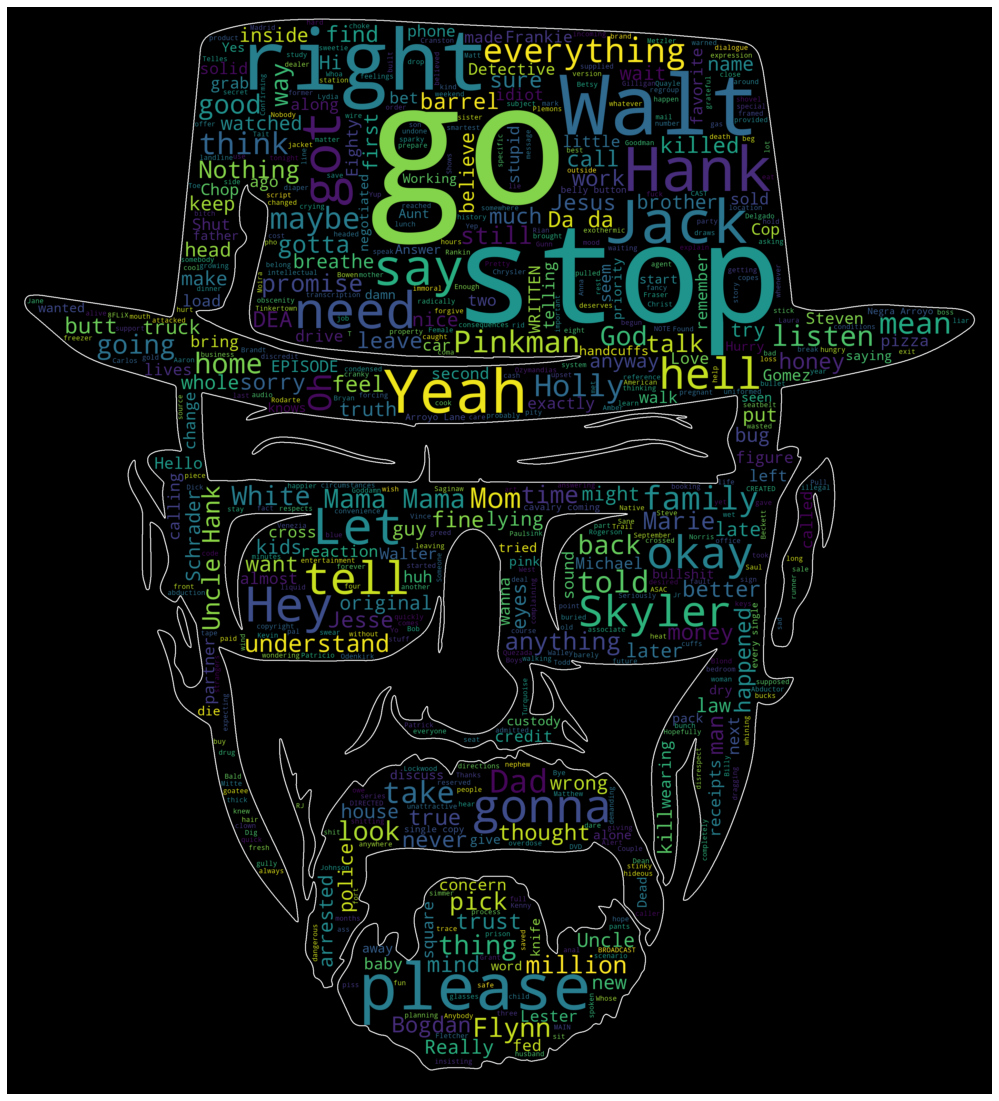

Wall time: 1min 15s


In [57]:
%%time

bb_wc = WordCloud(background_color = "black",
                  max_words        = 2000,
                  mask             = breakingbad_mask,
                  stopwords        = stopwords,
                  contour_width    = 2,
                  contour_color    = "white")

bb_wc.generate(breakingbad_script)

plt.subplots(figsize = (20, 20))

plt.imshow(bb_wc, interpolation = "bilinear")
plt.axis("off")
bb_wc.to_file("imagenbb.png")
plt.show()

In [ ]:
################################################################################################################################

### Ejercicio:
- Genera un **`wordcloud`** de algo que te interese. Saca la información de un archivo de internet, puedes usar el **`Api de Twitter`** para extraer la información, hacer **`web scraping`** sobre alguna página o simplemente descargar un **`.txt`**. Encuentra un archivo **`.png`** para hacer una mascara sobre el **`wordcloud`**, personaliza la gráfica como quieras.